[*********************100%***********************]  1 of 1 completed


15:38:06 - cmdstanpy - INFO - Chain [1] start processing
15:38:08 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4557,2023-02-10,4016.386597,3671.607064,4281.603939,4016.386597,4016.386597,-43.377350,-43.377350,-43.377350,-4.934005,-4.934005,-4.934005,-38.443345,-38.443345,-38.443345,0.0,0.0,0.0,3973.009247
4558,2023-02-13,4018.586967,3645.700917,4300.014306,4018.586967,4018.586967,-46.752487,-46.752487,-46.752487,-9.037690,-9.037690,-9.037690,-37.714797,-37.714797,-37.714797,0.0,0.0,0.0,3971.834480
4559,2023-02-14,4019.320424,3638.279806,4291.587327,4019.320424,4019.320424,-48.930796,-48.930796,-48.930796,-11.834013,-11.834013,-11.834013,-37.096783,-37.096783,-37.096783,0.0,0.0,0.0,3970.389629
4560,2023-02-15,4020.053881,3652.938937,4324.633559,4020.053881,4020.053881,-45.105598,-45.105598,-45.105598,-8.772083,-8.772083,-8.772083,-36.333515,-36.333515,-36.333515,0.0,0.0,0.0,3974.948283
4561,2023-02-16,4020.787338,3652.903052,4286.431716,4020.787338,4020.787338,-42.739706,-42.739706,-42.739706,-7.285365,-7.285365,-7.285365,-35.454341,-35.454341,-35.454341,0.0,0.0,0.0,3978.047632
4562,2023-02-17,4021.520795,3667.355026,4287.061106,4021.520795,4021.520795,-39.424396,-39.424396,-39.424396,-4.934005,-4.934005,-4.934005,-34.490391,-34.490391,-34.490391,0.0,0.0,0.0,3982.096399
4563,2023-02-20,4023.721165,3664.824571,4306.160301,4023.721165,4023.721165,-40.451861,-40.451861,-40.451861,-9.037690,-9.037690,-9.037690,-31.414171,-31.414171,-31.414171,0.0,0.0,0.0,3983.269304
4564,2023-02-21,4024.454622,3669.353581,4289.017809,4024.454622,4024.454622,-42.269107,-42.269107,-42.269107,-11.834013,-11.834013,-11.834013,-30.435094,-30.435094,-30.435094,0.0,0.0,0.0,3982.185515
4565,2023-02-22,4025.188079,3671.737491,4306.524355,4025.188079,4025.188079,-38.302740,-38.302740,-38.302740,-8.772083,-8.772083,-8.772083,-29.530656,-29.530656,-29.530656,0.0,0.0,0.0,3986.885339
4566,2023-02-23,4025.921536,3674.043273,4307.520737,4025.921536,4025.921536,-36.014381,-36.014381,-36.014381,-7.285365,-7.285365,-7.285365,-28.729016,-28.729016,-28.729016,0.0,0.0,0.0,3989.907154


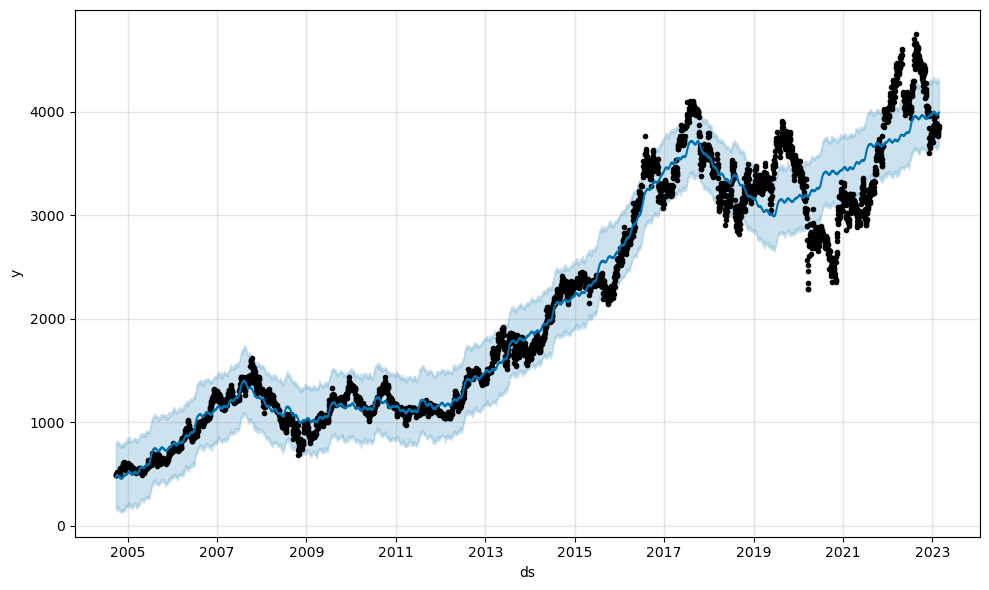

In [1]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
from datetime import date, timedelta

today_date = date.today()
td = timedelta(30)
mulai = today_date - td
end_ = today_date - timedelta(1)

# specify the stock symbol
ticker = "TLKM.JK"

# retrieve data using yfinance
#data = yf.download(ticker, start=mulai, end=end_)
# retrieve data using yfinance
#data = yf.download(ticker, start=mulai, end=end_)
data = yf.download(ticker, period="max", auto_adjust=True)

# create a new dataframe with date and close price
df = pd.DataFrame({'ds': data.index, 'y': data['Close']})
df['ds']=df['ds'].dt.tz_localize(None)

# instantiate the Prophet model
model = Prophet()

# fit the model to the data
model.fit(df)

# create a dataframe to hold future predictions
future_data = model.make_future_dataframe(periods=1)

# make predictions
forecast = model.predict(future_data)

# plot the forecast
model.plot(forecast)
forecast.tail(10)

In [41]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
from datetime import date, timedelta

today_date = date.today()
td = timedelta(1825)
mulai = today_date - td
end_ = today_date 

# specify the stock symbol
ticker = "TLKM.JK"

# retrieve data using yfinance
#data = yf.download(ticker, start=mulai, end=end_)
# retrieve data using yfinance
data = yf.download(ticker, start=mulai, end=end_)
#data = yf.download(ticker, period="max", auto_adjust=True)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20 00:00:00+07:00,4080.0,4080.0,4040.0,4070.0,3477.534668,53466600
2018-02-21 00:00:00+07:00,4040.0,4080.0,4020.0,4070.0,3477.534668,74130200
2018-02-22 00:00:00+07:00,4070.0,4070.0,4010.0,4010.0,3426.268799,91272600
2018-02-23 00:00:00+07:00,4030.0,4040.0,4010.0,4030.0,3443.357666,59706400
2018-02-26 00:00:00+07:00,4050.0,4050.0,4010.0,4030.0,3443.357666,56293900
...,...,...,...,...,...,...
2023-02-13 00:00:00+07:00,3800.0,3810.0,3750.0,3790.0,3790.000000,69004400
2023-02-14 00:00:00+07:00,3830.0,3830.0,3760.0,3800.0,3800.000000,80331100
2023-02-15 00:00:00+07:00,3810.0,3820.0,3730.0,3790.0,3790.000000,59028200
